## Importación de librerías y carga del archivo CTG.csv

In [1]:
import pandas as pd

from ctg_viz.preprocessing import (
    eliminar_columnas_nulos_altos,
    imputar_faltantes,
    recortar_outliers_iqr,
    remover_outliers_zscore,
)
from ctg_viz.categorization import check_data_completeness_nomnbrecompleto
import matplotlib.pyplot as plt

df = pd.read_csv("CTG.csv")
df.head()

,FileName,Date,SegFile,b,e,LBE,LB,AC,FM,UC,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
0,Variab10.txt,12/1/1996,CTG0001.txt,240.0,357.0,120.0,120.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,2.0
1,Fmcs_1.txt,5/3/1996,CTG0002.txt,5.0,632.0,132.0,132.0,4.0,0.0,4.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
2,Fmcs_1.txt,5/3/1996,CTG0003.txt,177.0,779.0,133.0,133.0,2.0,0.0,5.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
3,Fmcs_1.txt,5/3/1996,CTG0004.txt,411.0,1192.0,134.0,134.0,2.0,0.0,6.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
4,Fmcs_1.txt,5/3/1996,CTG0005.txt,533.0,1147.0,132.0,132.0,4.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0


## 1. Preprocesamiento inicial

### 1.1 Eliminar columnas con más del 20% de valores nulos

La función **eliminar_columnas_nulos_altos** calcula el porcentaje de valores nulos en cada columna y conserva solo las que tienen menos nulos que el umbral.  
**Recomendación para eliminar_columnas_nulos_altos:**  
Úsala cuando tengas columnas con demasiados datos faltantes,a veces es mejor quitar esas columnas para evitar ruido en el análisis.



In [2]:
df1 = eliminar_columnas_nulos_altos(df, umbral=0.2)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 0 to 2128
Data columns (total 40 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   FileName  2126 non-null   object 
 1   Date      2126 non-null   object 
 2   SegFile   2126 non-null   object 
 3   b         2126 non-null   float64
 4   e         2126 non-null   float64
 5   LBE       2126 non-null   float64
 6   LB        2126 non-null   float64
 7   AC        2126 non-null   float64
 8   FM        2127 non-null   float64
 9   UC        2127 non-null   float64
 10  ASTV      2127 non-null   float64
 11  MSTV      2127 non-null   float64
 12  ALTV      2127 non-null   float64
 13  MLTV      2127 non-null   float64
 14  DL        2128 non-null   float64
 15  DS        2128 non-null   float64
 16  DP        2128 non-null   float64
 17  DR        2128 non-null   float64
 18  Width     2126 non-null   float64
 19  Min       2126 non-null   float64
 20  Max       2126 non-null   floa

### 1.2 Imputación de valores faltantes (media/mediana para numéricos, moda para categóricos)

La función **imputar_faltantes** rellena los valores faltantes usando la mediana, la media o el método KNN, y en variables categóricas usa la moda.  
**Recomendación para imputar_faltantes:**  
Antes de imputar los valores faltantes, haz un conteo de nulos, si una columna tiene demasiados huecos, puede ser mejor eliminarla en lugar de imputarla.

In [3]:
df2 = imputar_faltantes(df1, usar_mediana=True)
df2.isna().sum()

FileName    0
Date        0
SegFile     0
b           0
e           0
LBE         0
LB          0
AC          0
FM          0
UC          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
DL          0
DS          0
DP          0
DR          0
Width       0
Min         0
Max         0
Nmax        0
Nzeros      0
Mode        0
Mean        0
Median      0
Variance    0
Tendency    0
A           0
B           0
C           0
D           0
E           0
AD          0
DE          0
LD          0
FS          0
SUSP        0
CLASS       0
NSP         0
dtype: int64

### 1.3 Tratamiento de outliers usando IQR

La función **recortar_outliers_iqr** ajusta los valores extremos recortándolos a un rango basado en el IQR para evitar que influyan demasiado.  
**Recomendación para recortar_outliers_iqr:**  
Se aplica cuando quieres reducir el impacto de valores extremos sin eliminar datos completos, pero revisa después que los patrones importantes no se hayan distorsionado.

In [18]:
df3 = recortar_outliers_iqr(df2)
df3.describe()

,b,e,LBE,LB,AC,FM,UC,ASTV,MSTV,ALTV,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
count,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000,...,2129.0,2129.0,2129.0,2129.0,2129.0,2129.0,2129.0,2129.0,2129.000000,2129.0
mean,877.960075,1702.226397,133.303429,133.303429,2.576327,1.247534,3.635979,47.010803,1.300564,6.655707,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.509159,1.0
std,893.545601,930.424123,9.833912,9.833912,3.122487,1.896097,2.755794,17.202667,0.771563,10.291867,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.024809,0.0
min,0.000000,287.000000,106.000000,106.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.0
25%,55.000000,1009.000000,126.000000,126.000000,0.000000,0.000000,1.000000,32.000000,0.700000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.000000,1.0
50%,538.000000,1241.000000,133.000000,133.000000,1.000000,0.000000,3.000000,49.000000,1.200000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.000000,1.0
75%,1518.000000,2434.000000,140.000000,140.000000,4.000000,2.000000,5.000000,61.000000,1.700000,11.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.000000,1.0
max,3296.000000,3599.000000,160.000000,160.000000,10.000000,5.000000,11.000000,87.000000,3.200000,27.500000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.000000,1.0


### 1.4 Remover outliers extremos con Z-score (opcional)

La función **remover_outliers_zscore** elimina las filas que contienen valores numéricos demasiado alejados del promedio según el z-score.  
**Recomendación para remover_outliers_zscore:**  
Eliminar filas con outliers ayuda a limpiar el dataset, solo hay que tener cuidado al usarlo ya que se puede perder información util para el análisis.

In [5]:
df4 = remover_outliers_zscore(df3)
df4.shape

(2129, 40)

### Previsualización del DataFrame final

In [6]:
df4.head(5)

,FileName,Date,SegFile,b,e,LBE,LB,AC,FM,UC,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
0,Variab10.txt,12/1/1996,CTG0001.txt,240.0,357.0,120.0,120.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,1.0
1,Fmcs_1.txt,5/3/1996,CTG0002.txt,5.0,632.0,132.0,132.0,4.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,1.0
2,Fmcs_1.txt,5/3/1996,CTG0003.txt,177.0,779.0,133.0,133.0,2.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,1.0
3,Fmcs_1.txt,5/3/1996,CTG0004.txt,411.0,1192.0,134.0,134.0,2.0,0.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,1.0
4,Fmcs_1.txt,5/3/1996,CTG0005.txt,533.0,1147.0,132.0,132.0,4.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0


## 2. Análisis de Datos

### 2.1 Revisión de completitud y clasificación automática de columnas

La función **check_data_completeness_nomnbrecompleto** revisa cada columna del DataFrame y genera un resumen con información como cuántos valores faltan, el porcentaje de completitud, el tipo de dato, valores mínimos y máximos, cantidad de valores únicos y una categoría basada en el tipo de variable.  
**Recomendación para check_data_completeness_nomnbrecompleto:**  
Revisa especialmente las columnas con poca variabilidad o muy pocos valores únicos, ya que pueden no aportar información útil y conviene considerarlas para eliminación o transformación.


In [19]:
reporte = check_data_completeness_nomnbrecompleto(df4)
reporte


,columna,faltantes,completitud %,tipo,std,var,min,max,unicos,categoria
0,FileName,0,100.0,object,NaN,NaN,NaN,NaN,352,otra
1,Date,0,100.0,object,NaN,NaN,NaN,NaN,48,otra
2,SegFile,0,100.0,object,NaN,NaN,NaN,NaN,2126,otra
3,b,0,100.0,float64,893.545601,798423.741356,0.0,3296.0,979,continua
4,e,0,100.0,float64,930.424123,865689.049284,287.0,3599.0,1064,continua
5,LBE,0,100.0,float64,9.833912,96.705820,106.0,160.0,48,continua
6,LB,0,100.0,float64,9.833912,96.705820,106.0,160.0,48,continua
7,AC,0,100.0,float64,3.122487,9.749928,0.0,10.0,11,continua
8,FM,0,100.0,float64,1.896097,3.595183,0.0,5.0,6,discreta
9,UC,0,100.0,float64,2.755794,7.594400,0.0,11.0,12,continua


## 3. Visualizaciones usando la librería ctg_viz

In [8]:
from ctg_viz.plots import (
    histograma_kde,
    boxplot_por_objetivo,
    barras_horizontales,
    dotplot_dos_grupos,
    densidad_por_clase,
    violin_swarm,
    mapa_correlacion
)

col_numerica = df4.select_dtypes(include='number').columns[0]

if "CLASS" in df4.columns:
    col_clase = "CLASS"
elif "NSP" in df4.columns:
    col_clase = "NSP"
else:
    col_clase = df4.select_dtypes(exclude="number").columns[0]


col_numerica, col_clase

('b', 'CLASS')

La función **histograma_kde** genera un histograma de una columna numérica y añade una curva de densidad (KDE) para mostrar cómo se distribuyen los valores; opcionalmente permite comparar grupos usando colores.  
**Recomendación para histograma_kde:**  
Úsalo para revisar rápidamente la forma de la distribución y detectar si los datos están sesgados, tienen varios picos o presentan valores atípicos antes de aplicar modelos estadísticos.

<Figure size 700x500 with 0 Axes>

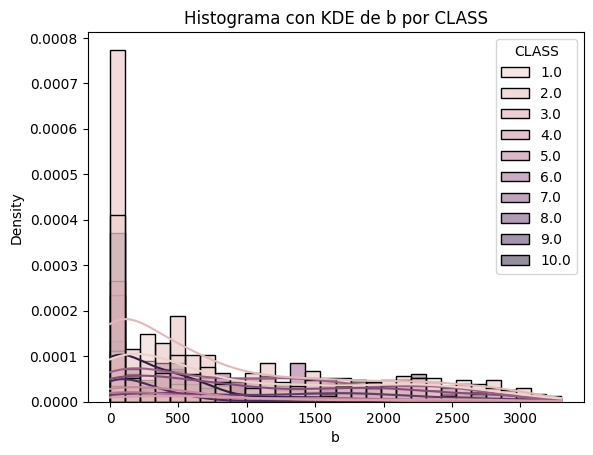

In [9]:
plt.figure(figsize=(7,5))
histograma_kde(df4, columna=col_numerica, grupo=col_clase)
plt.title(f"Histograma con KDE de {col_numerica} por {col_clase}")
plt.show()


La variable b está muy concentrada cerca de cero y cambia bastante según la clase.

La función **boxplot_por_objetivo** crea un boxplot que muestra cómo varía una columna numérica según las diferentes categorías del objetivo, permitiendo comparar distribuciones entre grupos.  
**Recomendación para boxplot_por_objetivo:**  
Úsalo para identificar diferencias claras entre grupos y detectar si alguna categoría presenta valores extremos o una distribución muy distinta, lo cual puede ser importante para el análisis predictivo.


<Figure size 700x500 with 0 Axes>

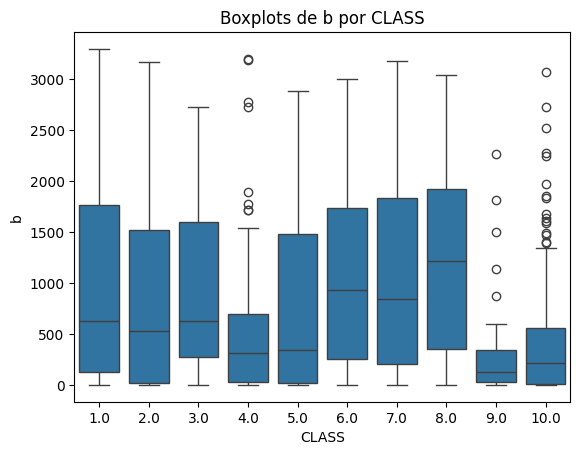

In [10]:
plt.figure(figsize=(7,5))
boxplot_por_objetivo(df4, columna=col_numerica, objetivo=col_clase)
plt.title(f"Boxplots de {col_numerica} por {col_clase}")
plt.show()

b tiene mucha variabilidad y muchos outliers, las clases muestran medianas y rangos diferentes.

La función **barras_horizontales** genera una gráfica de barras horizontales basada en los conteos de una columna categórica, ordenando las categorías de mayor a menor frecuencia.  
**Recomendación para barras_horizontales:**  
Úsala para identificar rápidamente cuáles categorías son más comunes y cuáles son raras, ya que esto ayuda a detectar posibles desbalances o valores poco representativos en el dataset.


<Figure size 700x500 with 0 Axes>

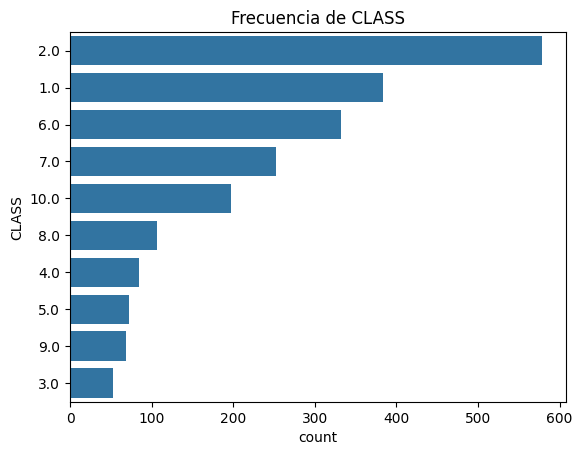

In [11]:
plt.figure(figsize=(7,5))
barras_horizontales(df4, columna=col_clase)
plt.title(f"Frecuencia de {col_clase}")
plt.show()

Las clases están desbalanceadas; la clase 2 es la más común y varias clases tienen pocos datos.

Este bloque de código toma una columna numérica, la ordena por su índice y genera una gráfica de línea para visualizar cómo cambian sus valores a lo largo del tiempo de manera simulada. La idea es interpretar el índice como si fuera una secuencia temporal.  
**Resumen:**  
Sirve para observar tendencias, patrones o variaciones en la columna como si fuera una serie temporal, lo cual ayuda a detectar comportamientos crecientes, decrecientes o irregulares en los datos.


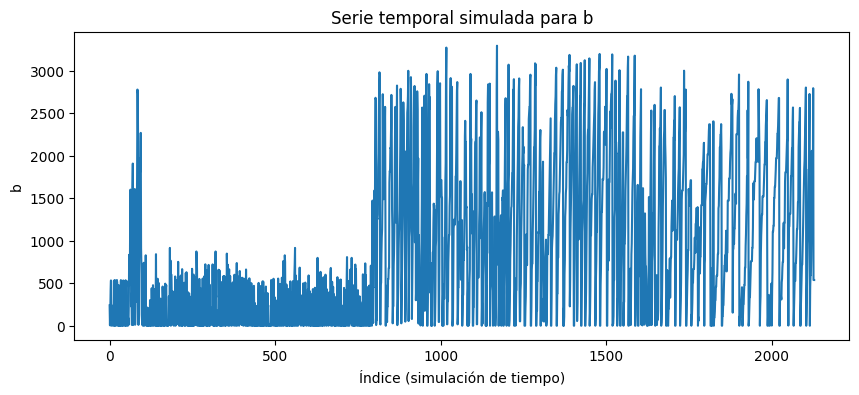

In [12]:
serie = df4[col_numerica].reset_index().sort_values(by='index')
plt.figure(figsize=(10,4))
plt.plot(serie['index'], serie[col_numerica])
plt.title(f"Serie temporal simulada para {col_numerica}")
plt.xlabel("Índice (simulación de tiempo)")
plt.ylabel(col_numerica)
plt.show()

b es muy variable y no sigue patrones claros

La función **dotplot_dos_grupos** crea un gráfico de puntos que muestra cómo se distribuyen los valores de una variable numérica entre dos o más grupos categóricos, permitiendo ver la dispersión individual de cada observación.  
**Recomendación para dotplot_dos_grupos:**  
Úsalo cuando quieras visualizar cómo se mezclan o separan los valores entre categorías, ya que es útil para detectar solapamientos, diferencias claras o posibles outliers dentro de cada grupo.


<Figure size 700x500 with 0 Axes>

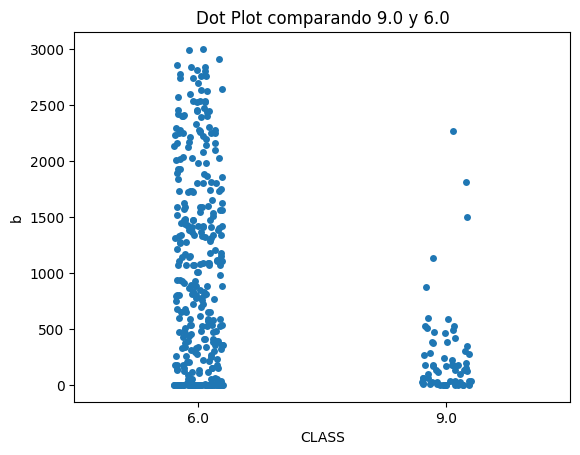

In [13]:
grupos = df4[col_clase].dropna().unique()

if len(grupos) >= 2:
    df_temp = df4[df4[col_clase].isin(grupos[:2])]
    plt.figure(figsize=(7,5))
    dotplot_dos_grupos(df_temp, valor=col_numerica, grupo=col_clase)
    plt.title(f"Dot Plot comparando {grupos[0]} y {grupos[1]}")
    plt.show()
else:
    print("No hay suficientes grupos para dot plot.") 

La clase 6 tiene valores mucho más altos que la clase 9, con una separación clara entre ambas

La función **densidad_por_clase** genera curvas de densidad para una variable numérica separadas por clases, permitiendo comparar cómo se distribuye la variable en cada categoría.  
**Recomendación para densidad_por_clase:**  
Úsala para identificar si las clases tienen patrones de distribución diferentes, lo cual puede ayudar a entender si una variable es útil para distinguir entre categorías o para modelado predictivo.


<Figure size 800x500 with 0 Axes>

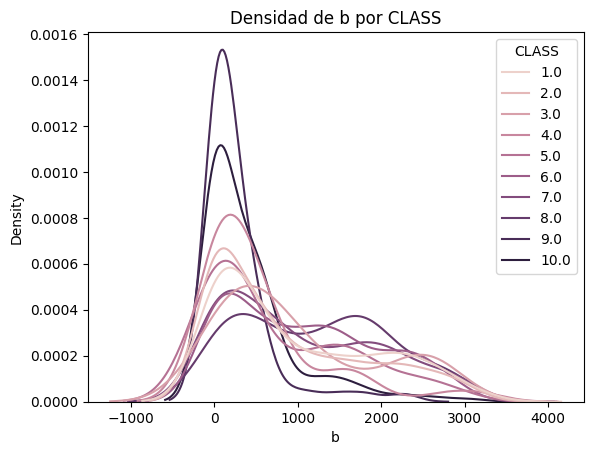

In [14]:
plt.figure(figsize=(8,5))
densidad_por_clase(df4, valor=col_numerica, clase=col_clase)
plt.title(f"Densidad de {col_numerica} por {col_clase}")
plt.show()

Cada clase tiene una forma distinta de distribución de b

La función **violin_swarm** combina un violin plot con un swarm plot para mostrar la forma de la distribución de una variable numérica por categoría y, además, la posición de cada dato individual dentro de esa distribución.  
**Recomendación para violin_swarm:**  
Úsala cuando quieras ver tanto el patrón general de la distribución como el comportamiento de los valores individuales, ya que ayuda a detectar outliers, densidades diferentes entre grupos y posibles solapamientos.


/home/roberto/Descargas/venv/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 28.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/roberto/Descargas/venv/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 44.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/roberto/Descargas/venv/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 19.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/roberto/Descargas/venv/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 20.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/roberto/Descargas/venv/lib/python3.12/

<Figure size 800x500 with 0 Axes>

/home/roberto/Descargas/venv/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 28.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/roberto/Descargas/venv/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 42.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/roberto/Descargas/venv/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 17.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/roberto/Descargas/venv/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 26.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


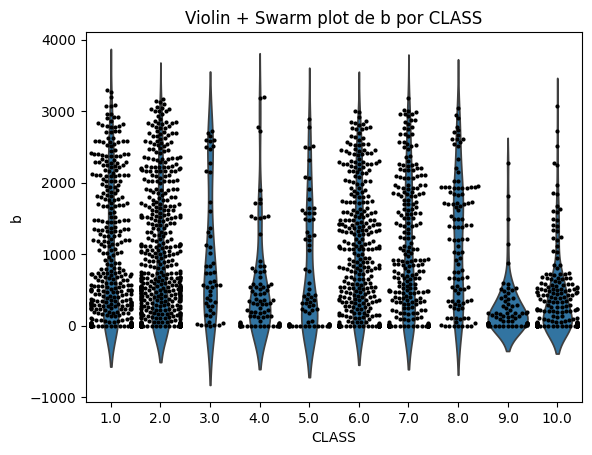

In [15]:
plt.figure(figsize=(8,5))
violin_swarm(df4, columna=col_numerica, objetivo=col_clase)
plt.title(f"Violin + Swarm plot de {col_numerica} por {col_clase}")
plt.show()

Las distribuciones de b varían por clase y hay muchos valores extremos en casi todas

La función **mapa_correlacion** calcula la correlación entre las columnas numéricas del DataFrame y muestra un mapa de calor donde es fácil visualizar qué variables están más relacionadas entre sí.  
**Recomendación para mapa_correlacion:**  
Úsala para identificar relaciones fuertes entre variables, ya que te ayuda a detectar redundancias, posibles multicolinealidades y columnas que podrían aportar información útil o que conviene descartar.


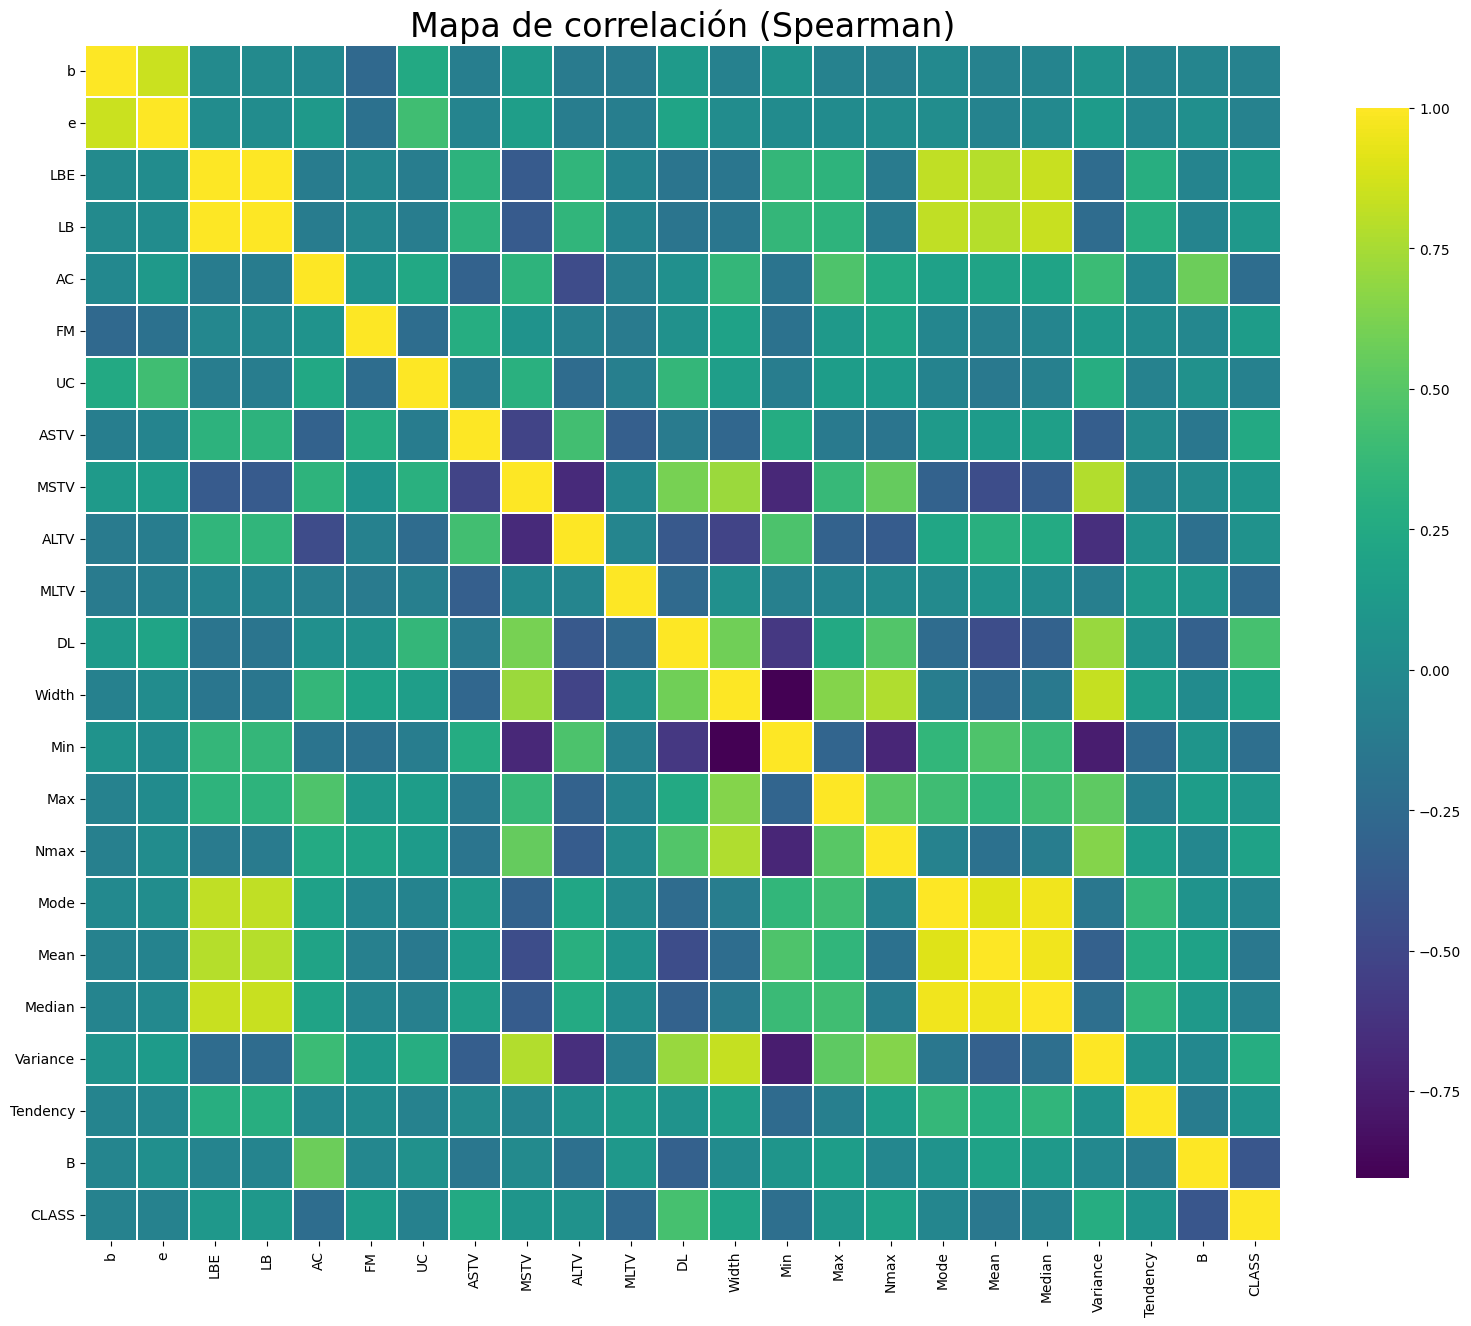

In [17]:
fig, ax = plt.subplots(figsize=(16, 14))

mapa_correlacion(df4, metodo='spearman', ax=ax)

ax.set_title("Mapa de correlación (Spearman)", fontsize=24)
ax.tick_params(axis='x', rotation=90)
ax.tick_params(axis='y', rotation=0)

plt.tight_layout()
plt.show()



No hay correlaciones muy fuertes entre b y otras variables

### Conclusión

La mayoría de las variables numéricas muestran una alta variabilidad, especialmente la variable b, que presenta valores muy dispersos, distribución altamente sesgada. Las gráficas confirman que b cambia de forma importante entre clases, mostrando diferencias claras en su comportamiento según la categoría.

Las clases del objetivo (CLASS) están desbalanceadas, lo cual se observa en la gráfica de barras y puede afectar modelos predictivos.

El mapa de correlación muestra relaciones moderadas entre algunas variables, pero en general no existen correlaciones extremadamente fuertes, lo cual sugiere que cada variable aporta información distinta.